# ***Neural Netword from Scratch***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Activation function

#   1. Relu(x)
def relu(x):
  return np.maximum(x, 0)

#   2. Softmax(x)
def softmax(x):
  expX = np.exp(x)
  sum = np.sum(expX, axis = 1) 
  for i in range(x.shape[0]):
    expX[i] /= sum[i]
  return expX

In [ ]:
def relu_der(x):
    return np.array(x > 0, dtype = np.int64)

# ***Neural Netword with L2_Regularization and Dropout***

https://github.com/Coding-Lane/L2-Regularization/blob/main/Assignment%20-%20L2%20Regularization%20.ipynb

In [ ]:
class Neural_Network:
  def __init__(self, layers, alpha, m):
    self.layers = layers
    self.learning_rate = alpha
    self.m = m
    self.W = []
    self.B = []
    #   Initialize weights & bias
    for i in range(len(self.layers) - 1):
      w_ = np.random.rand(self.layers[i], self.layers[i+1]) - 0.5
      self.W.append(w_)
      b_ = np.random.rand(1, layers[i+1]) - 0.5
      self.B.append(b_)

  def train(self, X_train, Y_train):
    # ================ Forward Propagation ===============
    A = [X_train]
    for i in range(len(self.layers) - 2):
      # Hidden layes use Relu_func
      A.append(relu(np.dot(A[-1], self.W[i]) + self.B[i]))
    #  Output layer uses Softmax_func
    A.append(softmax(np.dot(A[-1], self.W[-1]) + self.B[-1]))

    # ================ Backward Propagation ================
    A_der = [A[-1] - Y_train]
    W_der = []
    B_der = []
    for i in reversed(range(len(self.layers) - 1)):
        W_ = (1/self.m) * np.dot(A[i].T, A_der[-1]) + (lambd/self.m)*self.W[i]
        B_ = (1/self.m) * np.sum(A_der[-1], axis = 0, keepdims = True)  
        A_ = np.dot(A_der[-1], self.W[i].T) * relu_der(A[i])
        W_der.append(W_)
        B_der.append(B_)
        A_der.append(A_)

    # Đảo ngược W_der & B_der
    W_der = W_der[::-1]
    B_der = B_der[::-1]

    #   Gradient Descend
    for i in range(len(self.layers) - 1):
      self.W[i] -= self.learning_rate * W_der[i]
      self.B[i] -= self.learning_rate * B_der[i]

  #  Dự đoán:
  def predict(self, X_train):
    for i in range(len(self.layers) - 2):
      X_train = relu(np.dot(X_train, self.W[i]) + self.B[i])
    X_train = softmax(np.dot(X_train, self.W[-1]) + self.B[-1])
    return X_train

  #   Categorical Cross Entropy
  def calc_cost(self, X_train, Y_train, lambd):
    pred = self.predict(X_train) 
    cost = -(1/self.m) * np.sum(Y_train * np.log(pred))
    L2_regularization = (lambd)/(2*self.m)*(np.sum(np.square(self.W[0])) + np.sum(np.square(self.W[1])) + np.sum(np.square(self.W[2])))
    return cost + L2_regularization

  def fit_data(self, X_train, Y_train, lambd, epoches):
    cost_his = []
    for epoch in range(epoches):
      self.train(X_train, Y_train)
      cost_his.append(self.calc_cost(X_train, Y_train, lambd))
    return cost_his

  #   Calculate accuracy 
  def Calc_acc(self, X_data, labels):
    output = self.predict(X_data)
    a_out = np.argmax(output, axis = 1)
    label = np.argmax(labels, axis = 1)
    acc = np.mean(a_out == label) * 100
    return acc

In [ ]:
cd /content/drive/MyDrive/Basic_DeepLearning/Neural_Network

/content/drive/MyDrive/Basic_DeepLearning/Neural_Network


In [ ]:
X_train = pd.read_csv("train_X.csv", header = None).values
Y_train = pd.read_csv("train_label.csv", header = None).values
X_test = pd.read_csv("test_X.csv", header = None).values
Y_test = pd.read_csv("test_label.csv", header = None).values

In [ ]:
#   Normalize train_data & test_data
X_train = X_train / 255
X_test = X_test / 255

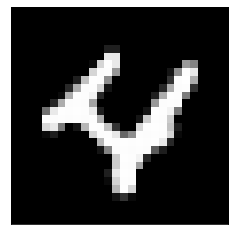

In [ ]:
index = np.random.randint(X_train.shape[0])
plt.imshow(X_train[index, :].reshape(28, 28), cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
learning_rate = 0.08
epoches = 10000
# Set number of layer & node
input_layer = X_train.shape[1]   #  784
hidden_1 = 512
hidden_2 = 256
#hidden_3 = 128
output_layer = 10
m = X_train.shape[0]
lambd = 0.7

net = Neural_Network([input_layer, hidden_1, hidden_2, output_layer], learning_rate, m)
cost = net.fit_data(X_train, Y_train, lambd, epoches)
print('COST: ', cost)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in multiply


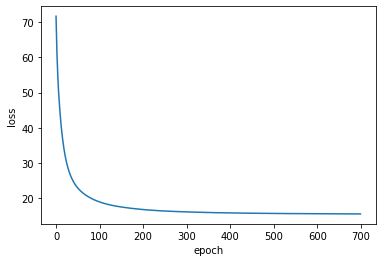

In [ ]:
#   Vẽ đồ thị epoch và loss
plt.plot(cost)
plt.xlabel("epoch")
plt.ylabel("loss");

In [ ]:
print("Accuracy of Train Dataset", round(net.Calc_acc(X_train, Y_train), 2), "%")
print("Accuracy of Test Dataset", round(net.Calc_acc(X_test, Y_test), 2), "%")

Accuracy of Train Dataset 100.0 %
Accuracy of Test Dataset 73.71 %


##2. Sử dụng keras

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = None)


In [ ]:
# Build model
from keras import Sequential
model = Sequential()

from keras.layers import Dense
model.add(Dense(512, input_dim = 784, activation = 'tanh'))
model.add(Dense(256, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(10, activation = 'softmax'))

# Summary model
model.summary()

In [ ]:
# Compile model
from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#   Callback function:  https://www.miai.vn/2020/09/05/keras-callbacks-tro-thu-dac-luc-khi-train-models/
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0, mode = 'auto', patience = 5, restore_best_weights = True)

from keras.callbacks import ModelCheckpoint
path = '/content/gdrive/MyDrive/Basic_DeepLearning/Neural_Network/checkpoint'
checkpoint = ModelCheckpoint(path, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'auto')

import tensorflow as tf

def scheduler(epoch, lr):
    # Nếu dưới 5 epoch
    if epoch < 5:
        # Trả về lr
        return float(lr)
    else:
        # Còn không thì trả về
        return float(lr * tf.math.exp(-0.1))

print("Learning rate ban đầu = ", round(model.optimizer.lr.numpy(), 5))
from keras.callbacks import LearningRateScheduler
lear_rate = LearningRateScheduler(scheduler)

# Train model
H = model.fit(X_train, Y_train, epochs = 50, batch_size = 150, verbose = 2, validation_data = (X_val, Y_val), callbacks = [early_stop, checkpoint, lear_rate])
print("Learning rate sau khi train xong epochs = ", round(model.optimizer.lr.numpy(), 5))

In [ ]:
cost = H.history['loss']
plt.plot(cost);

In [ ]:
cost, accuracy = model.evaluate(X_test, Y_test, verbose = 0)
print('Test loss:', cost)
print('Test accuracy:', accuracy)

$=>$ Cost của tập Test khá cao

In [ ]:
#   Save model
model.save("/content/gdrive/MyDrive/Basic_DeepLearning/Neural_Network/My_model")

In [ ]:
lst = []
a = np.random.randint(0, 10, (3, 4))
lst.append(a)
b = np.random.randint(0, 10, (4, 4))
lst.append(b)
c = np.random.randint(0, 10, (4, 1))
lst.append(c)